In [10]:
df <- read.table("CPX_experiments.txt",sep="\t",header=TRUE)

Now you will choose an independent variable (X-variable) to fit to pressure. Think about whether the variables should be linear or nonlinear.

You can change the graphical plotting parameters using what you learnt earlier, and also using the following link: https://www.statmethods.net/advgraphs/parameters.html

You can also add two parameters into your dataset that you might want to subset to better improve the model:
V1 - temperature
V2 - experiment chemistry

Then fit a statistical model for the data and examine how well the model fits the data, using the R<sup>2</sup> value and the graph with the fitted line.

QUESTION: WE NOW USE THE FUNCTION "EXPRESSION" TO PLOT THE GRAPH AXES, DO YOU NOTICE THE DIFFERENCE?

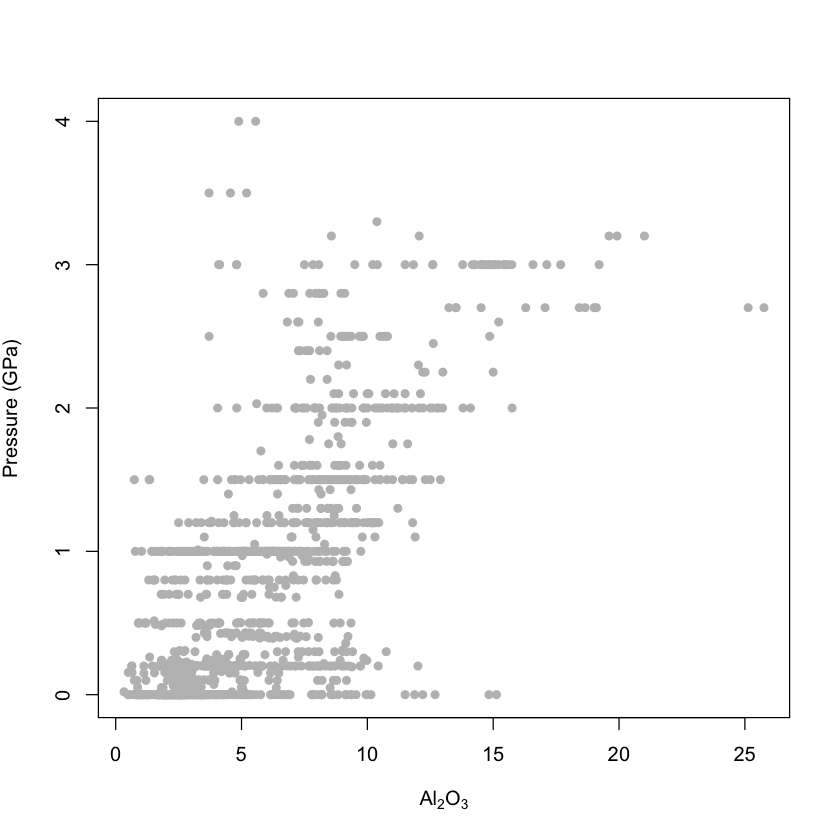

In [11]:
Y <- df$P_GPa
X <- df$Al2O3.cpx
ylab <- expression(paste("Pressure (GPa)"))
xlab <- expression(paste("Al"[2],"O"[3]))

V1 <- df$T_K
V2 <- df$Al2O3.liq + df$FeOt.liq

data_all <- data.frame(Y,X,V1,V2)

no.data <- which(is.na(data_all)==TRUE,arr.ind=TRUE)
data_all <- invisible(if(length(no.data)>0) {data_all[-unique(no.data[,1]),]} else {data_all})

plot(data_all$X,data_all$Y,col="grey",pch=16,cex=1,xlab=xlab,ylab=ylab)


Now choose parameters to subset the data, based on how you defined V1 and V2 above.

QUESTION: WHAT DO YOU KNOW ABOUT THE GEOPHYSICAL OBSERVATIONS OF THE BARDABUNGA ERUPTION AND HOW DOES THIS INFLUENCE YOUR CHOICE OF EXPERIMENTS TO USE?

QUESTION: DO YOU THINK IT IS A GOOD IDEA TO SUBSET THE DATA FROM THE EXPERIMENTS A LOT?


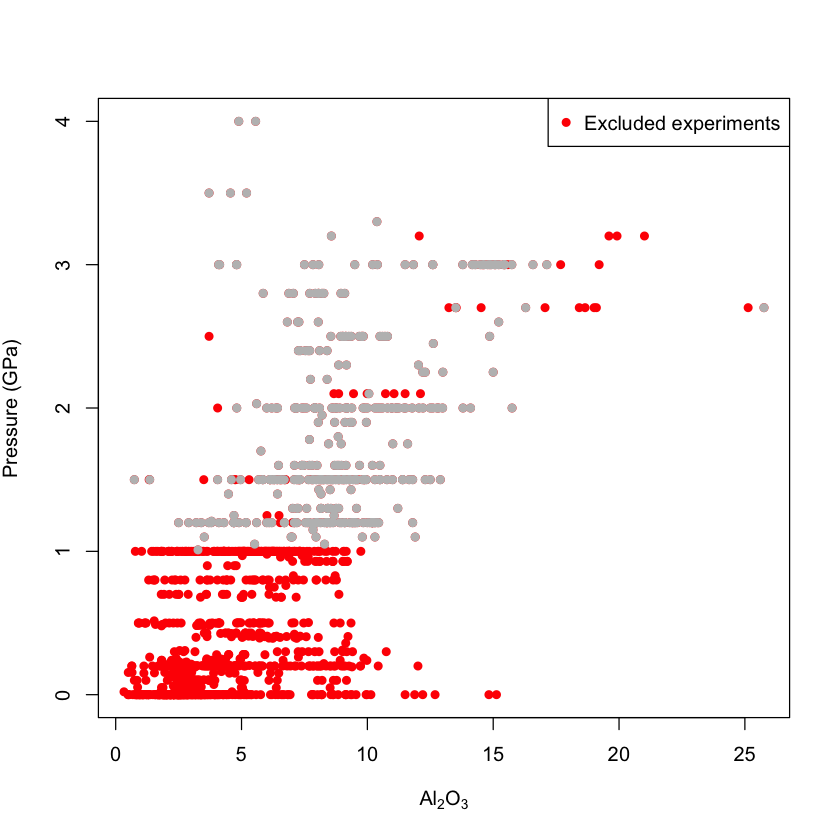

In [23]:
plot(data_all$X,data_all$Y,col="red",pch=16,cex=1,xlab=xlab,ylab=ylab)
id.subset <- which(data_all$V1 > 900 & data_all$V2 > 18 & data_all$Y > 1^-3)
               
data <- data_all[id.subset,]
points(data$X,data$Y,col="grey",pch=16,cex=1)
legend("topright",pch=16, col="red",legend = c("Excluded experiments"))

Now fit the statistical model, think about whether the variables should be linear or nonlinear.

Keep re-running this code (in part D) until you design a model that best fits the data. You can use the previous parts (A,B and C) to help you make your choice.


Call:
lm(formula = Y ~ X, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3416 -0.3301 -0.0744  0.3119  3.3273 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.124395   0.032717  -3.802  0.00015 ***
X            0.162996   0.004844  33.647  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6163 on 1337 degrees of freedom
Multiple R-squared:  0.4585,	Adjusted R-squared:  0.4581 
F-statistic:  1132 on 1 and 1337 DF,  p-value: < 2.2e-16


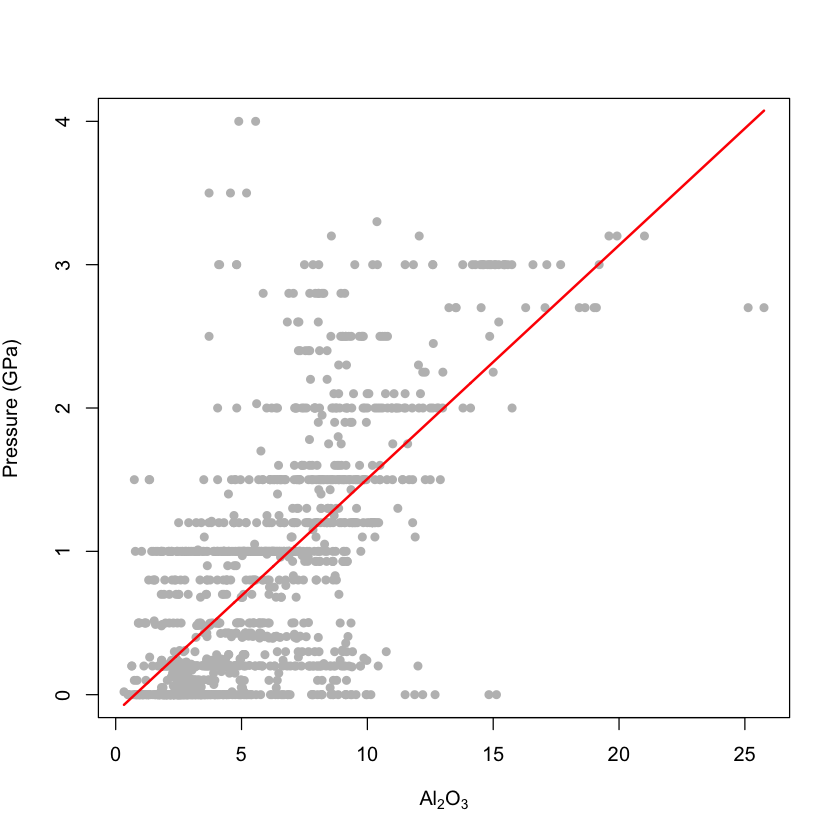

In [42]:
Model <- lm(Y ~ X, data=data)
summary(Model)

plot(data$X,data$Y,col="grey",pch=16,cex=1,xlab=xlab,ylab=ylab)
lines(sort(data$X), fitted(Model)[order(data$X)], col="red", type='l',lwd=2) 

Once you have decided on the best statistical model, using the results of the regression above predict the pressure that cpx crystallised in the magmatic system below Bardabunga.


In [43]:
bardabunga <- read.table("cpx_bardabunga.txt",sep="\t",header=TRUE)

Don't forget to choose the correct element, depending upon which element you choose to define the model above!

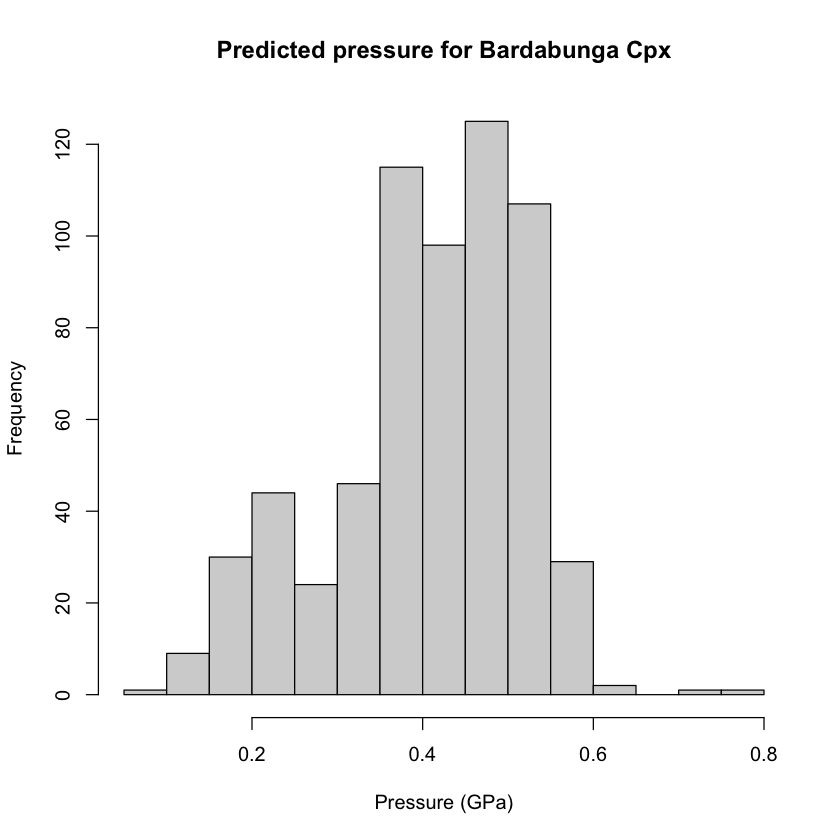

In [44]:
measured.chemistry <- data.frame(X = bardabunga$Al2O3)

bardabunga.pressure <- predict(Model,newdata=measured.chemistry)

hist(bardabunga.pressure,xlab="Pressure (GPa)",main="Predicted pressure for Bardabunga Cpx")

Now, we split the data into five different months of the eruption:

1. October 2014 ("Oct")
2. December 2014 ("Dec")
3. January 2015 ("Jan")
4. February 2015 ("Feb")
5. March 2015 ("Mar")

Use the text in quotation marks to subset the bardabunga data by month, using the "grep" command below.

In [46]:
month.id <- grep(bardabunga$Eruption_period,pattern = "Mar")
month <- bardabunga[month.id,]

Don't forget to change the title of the graph!
Don't forget to choose the correct element, depending upon which element you choose to define the model!

QUESTION: IS THERE ANY VARIATION IN THE PRESSURE OR TEMPERATURE OF THE MAGMA THROUGH THE ERUPTION?

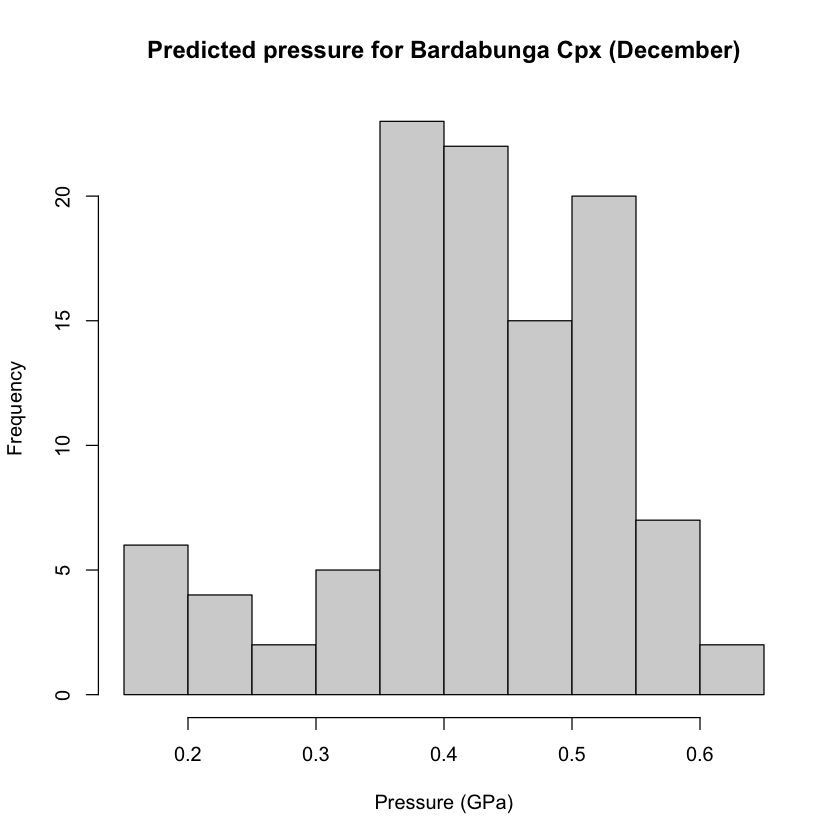

In [47]:
measured.chemistry <- data.frame(X = month$Al2O3)
month.pressure <- predict.lm(Model,newdata=measured.chemistry)
hist(month.pressure,xlab="Pressure (GPa)",main="Predicted pressure for Bardabunga Cpx (December)")

Now we can plot the meausured experimental pressure, versus the modelled pressure.

QUESTION: DOES YOUR REGRESSION OVER- OR UNDER-FIT THE PRESSURE AND AND HOW DOES THIS VARY WITH TEMPERATURE? IS THIS TO DO WITH HOW YOU SUBSETTED THE DATA?

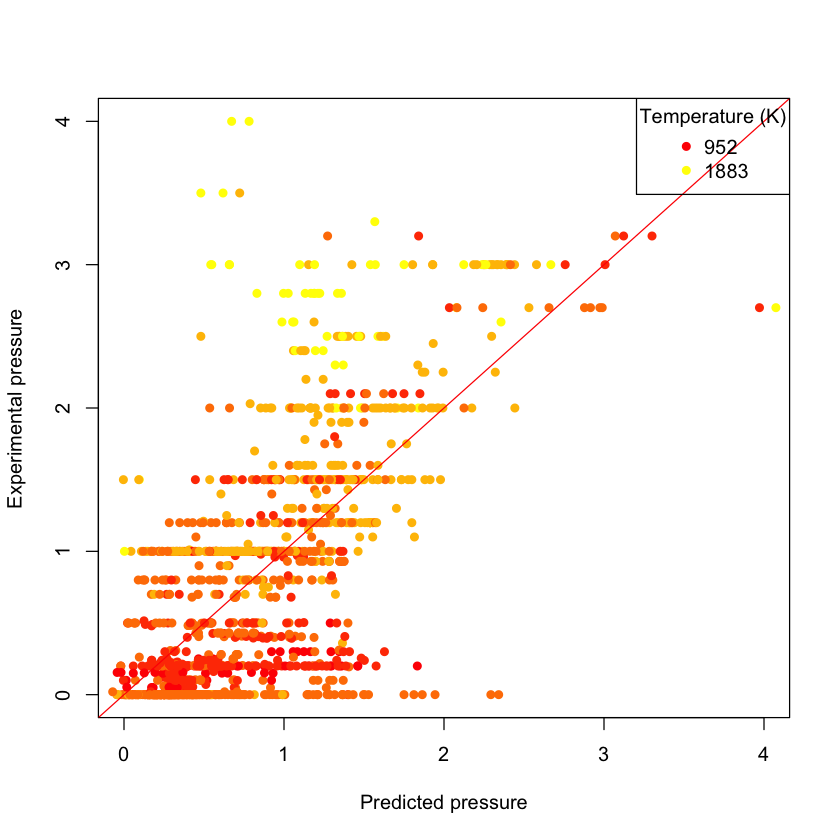

In [60]:
measured.chemistry <- data.frame(X = df$Al2O3.cpx)

colourvar <- df$T_K
colourvarname <- "Temperature (K)"
n.colours <- 5
pal <- colorRampPalette(c("red", "yellow"))

col.points <- pal(n.colours)[cut(colourvar,breaks = n.colours)] #do not change

plot(predict(Model,newdata=measured.chemistry),df$P_GPa,xlim=c(0,4),ylim=c(0,4),col=col.points,pch=16, xlab = "Predicted pressure", ylab = "Experimental pressure")
abline(a=0,b=1,col="red")
legend("topright",title = colourvarname,legend = round(c(min(df$T_K),max(df$T_K)),0),col = pal(2), pch = 16) #do not change